In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

In [2]:
Data = pd.ExcelFile('C:/Users/PC/Desktop/Data_raw.xlsx').parse('data_m')
Date = Data.iloc[:,0].copy()
K200 = Data.iloc[:,1].copy()
USDKRW = Data.iloc[:,5].copy()
Rf = Data.iloc[:,7].copy()         # LIBOR 1m
Data

,Date,K200,CD3m,CD1m,Call1d,USDKRW,USDLIBOR3m,USDLIBOR1m
0,1990-01-31,97.83,15.00,14.000,13.00,686.3,8.37500,8.31250
1,1990-02-28,94.06,15.00,14.000,13.00,694.0,8.37500,8.37500
2,1990-03-31,92.10,15.00,14.000,13.00,702.1,8.50000,8.37500
3,1990-04-30,74.93,15.00,14.000,13.00,707.0,8.68750,8.50000
4,1990-05-31,87.67,15.00,14.000,13.00,712.3,8.37500,8.31250
5,1990-06-30,78.05,15.00,14.000,13.00,716.0,8.37500,8.31250
6,1990-07-31,75.17,15.00,14.000,13.00,715.1,7.98438,8.00000
7,1990-08-31,66.76,15.00,14.000,13.00,714.0,8.06250,8.06250
8,1990-09-29,66.88,15.00,14.000,13.00,712.9,8.31250,8.26563
9,1990-10-31,76.32,15.00,14.000,13.00,713.8,8.06250,7.93750


In [3]:
# Equal weight 전략 수립
## C/G Holding Period Return(HPR(%))

R1 = (K200/K200.shift(1)-1)*100
R2 = (USDKRW/USDKRW.shift(1)-1)*100
r_Rf = Rf.shift(1)/12

In [4]:
# I/G HPR(%)
## USD 이자를 KRW 이자로 환전하는 효과를 반영해서 KRW 수익률 계산.

IR_2 = ((1+r_Rf/100)*(1+R2/100)-1)*100

In [5]:
# HPR(%)

r_R1 = R1
r_R2 = R2 + IR_2

In [6]:
# Equal weight

w1 = 0.5
w2 = 0.5

In [7]:
# 동일가중 전략 Portfolio return

Rp = (w1*r_R1) + (w2*r_R2)

In [8]:
# 날짜 수정

chDateNum = 19941228
chDate = pd.to_datetime(str(chDateNum),format='%Y%m%d')
idx = np.argmin(np.abs(Date - chDate))

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [10]:
Time = Date[idx:].copy().reset_index(drop=True)
V_Rp = Rp[idx:].copy().reset_index(drop=True)
numData = Time.shape[0]
Time

0     1994-12-28
1     1995-01-28
2     1995-02-28
3     1995-03-31
4     1995-04-29
5     1995-05-31
6     1995-06-30
7     1995-07-31
8     1995-08-31
9     1995-09-30
10    1995-10-31
11    1995-11-30
12    1995-12-27
13    1996-01-31
14    1996-02-29
15    1996-03-30
16    1996-04-30
17    1996-05-31
18    1996-06-29
19    1996-07-31
20    1996-08-31
21    1996-09-30
22    1996-10-31
23    1996-11-30
24    1996-12-27
25    1997-01-31
26    1997-02-28
27    1997-03-31
28    1997-04-30
29    1997-05-31
         ...    
264   2016-12-29
265   2017-01-31
266   2017-02-28
267   2017-03-31
268   2017-04-28
269   2017-05-31
270   2017-06-30
271   2017-07-31
272   2017-08-31
273   2017-09-29
274   2017-10-31
275   2017-11-30
276   2017-12-28
277   2018-01-31
278   2018-02-28
279   2018-03-30
280   2018-04-30
281   2018-05-31
282   2018-06-29
283   2018-07-31
284   2018-08-31
285   2018-09-28
286   2018-10-31
287   2018-11-30
288   2018-12-28
289   2019-01-31
290   2019-02-28
291   2019-03-

In [11]:
# 동일가중 Vp

Vp = pd.Series(np.zeros(numData))
Vp[0] = 100
for t in range(1, numData):
    Vp[t] = Vp[t-1]*(1+V_Rp[t]/100)

In [12]:
# 동일가중 MDD(Maximum DrawDown)

Vmax = Vp.cummax()                 ## cumulative max
MDD_V = (Vp/Vmax-1)*100

In [13]:
# Risk Parity 전략 수립
## 표준편차 rolling을 통해 추출

Risk_r1 = r_R1.rolling(12).std()
Risk_r2 = r_R2.rolling(12).std()

In [14]:
# 자산 비중 선정 

Risk_P_w1 = Risk_r2/(Risk_r1 + Risk_r2)
Risk_P_w2 = Risk_r1/(Risk_r1 + Risk_r2)

In [15]:
# 리스크 패리티 전략 Portfolio return

Risk_P_Rp = (r_R1 * Risk_P_w1) + (r_R2 * Risk_P_w2)

In [16]:
# 리스크 패리티 Vp

Risk_P_V_Rp = Risk_P_Rp[idx:].copy().reset_index(drop=True)
Risk_P_Vp = pd.Series(np.zeros(numData))
Risk_P_Vp[0] = 100
for t in range(1, numData):
    Risk_P_Vp[t] = Risk_P_Vp[t-1] * (1+Risk_P_V_Rp[t]/100)

In [17]:
# 리스크 패리티 MDD

Risk_P_Vmax = Risk_P_Vp.cummax()
MDD_Risk_P_V = (Risk_P_Vp/Risk_P_Vmax-1)*100

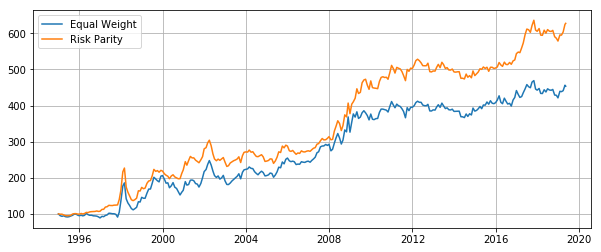

In [18]:
# Value & MDD Draw

plt.figure(figsize=(10,4))
plt.plot(Time,Vp,label="Equal Weight")
plt.plot(Time,Risk_P_Vp, label="Risk Parity")
plt.grid(True)
plt.legend()

In [19]:
fig = plt.figure(figsize=(10,4))
gs = GridSpec(nrows=2, ncols=1, height_ratios=[8,3], width_ratios=[5])

<Figure size 720x288 with 0 Axes>

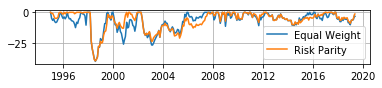

In [20]:
ax0 = plt.subplot(gs[1])
ax0.plot(Time, MDD_V, label='Equal Weight')
ax0.plot(Time, MDD_Risk_P_V, label='Risk Parity')
ax0.grid(True)
ax0.legend()
plt.show()